# Installing Required Libraries

In this section, we install the necessary libraries that are required for data processing, model building, and visualization. The following libraries are installed:

- **torch**: The core library for deep learning, used for building and training models.
- **numpy**: A fundamental package for scientific computing with Python, used for handling arrays and matrices.
- **pandas**: A library for data manipulation and analysis, especially with structured data (e.g., CSV, Excel).
- **seaborn**: A statistical data visualization library based on Matplotlib, used for creating attractive and informative visualizations.
- **plotly**: A graphing library for creating interactive plots.
- **wordcloud**: A tool to generate word clouds from text data.
- **spacy**: A natural language processing library used for text processing tasks like tokenization, part-of-speech tagging, and named entity recognition.
- **scikit-learn**: A machine learning library used for building and evaluating machine learning models.
- **transformers**: A library by Hugging Face that provides pre-trained transformer models (like BERT, GPT, etc.) for various NLP tasks.
- **contractions**: A utility to expand contractions in text (e.g., "I'm" to "I am").
- **wandb**: A library for tracking experiments and visualizing machine learning model performance.
- **sentencepiece**: A subword tokenizer and text encoder used for various NLP models.

The installation of these libraries ensures that we have all the necessary tools to carry out data preprocessing, model training, and evaluation.


In [ ]:
!pip install torch numpy pandas seaborn plotly wordcloud spacy scikit-learn transformers contractions wandb sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.4 MB/s eta 0:00:00


# Importing the libraries

In [ ]:
# ================== PyTorch Modules ==================
import torch
import torch.nn as nn
import torch.nn.utils.rnn as nn_utils
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

# ================== General Purpose Libraries ==================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ================== Visualization Libraries ==================
import plotly.graph_objects as go
from wordcloud import WordCloud

# ================== Text Processing and NLP ==================
import re
import contractions
import spacy  #
from spacy.lang.en.stop_words import STOP_WORDS

# ================== Model Evaluation and Data Splitting ==================
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# ================== Hugging Face Transformers ==================
from transformers import (
    BertForSequenceClassification,
    BertTokenizer,
    RobertaForSequenceClassification,
    RobertaTokenizer,
    XLNetTokenizer,XLNetForSequenceClassification,AdamW)

# ================== Downloading and Loading SpaCy Model ==================
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

print("Everything imported successfully")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Everything imported successfully


In this section, we log into **Weights and Biases (WandB)**, a tool that helps in tracking machine learning experiments and monitoring them in real time. It provides detailed reports, graphs, and other insights about model performance, which can be invaluable for debugging and understanding model behavior during training.

**Steps for logging into WandB**:
1. **Import the `wandb` library**: This library provides functionality to track experiments and visualize results directly from Jupyter notebooks.
2. **Login using `wandb.login()`**: This function will prompt the user to log into WandB. If you already have a WandB account, it will allow you to authenticate. If not, you will need to create one and follow the prompts.


In [ ]:
# Logging into the Weights and Bias for doing the Monitoring in Real time
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ys7233831. Use `wandb login --relogin` to force relogin


True

| **Requirement Type**         | **Count** | **Details**                                                                 |
|-------------------------------|-----------|-----------------------------------------------------------------------------|
| **Functional Requirement (F)**| 444       | Requirements specifying what the system must do.                           |
| **Non-Functional Requirements (NFRs)** | 525       | Attributes related to how the system performs rather than what it does.    |
| &nbsp;&nbsp;Availability (A)         | 31        | Uptime and fault tolerance capabilities.                                   |
| &nbsp;&nbsp;Legal (L)                | 15        | Compliance with legal and regulatory standards.                           |
| &nbsp;&nbsp;Look-and-Feel (LF)       | 49        | Aesthetic and design-related requirements.                                |
| &nbsp;&nbsp;Maintainability (MN)     | 24        | Ease of updating and maintaining the system.                              |
| &nbsp;&nbsp;Operability (O)          | 77        | Ease of operations and management by users or administrators.             |
| &nbsp;&nbsp;Performance (PE)         | 67        | Response time, throughput, and efficiency metrics.                        |
| &nbsp;&nbsp;Scalability (SC)         | 22        | Ability to scale with increased workload.                                 |
| &nbsp;&nbsp;Security (SE)            | 125       | Protection against unauthorized access, threats, and vulnerabilities.     |
| &nbsp;&nbsp;Usability (US)           | 85        | Ease of use and user experience.                                          |
| &nbsp;&nbsp;Fault Tolerance (FT)     | 18        | System’s ability to recover from faults or errors.                        |
| &nbsp;&nbsp;Portability (PO)         | 12        | Ability to transfer the system to different environments/platforms.       |

# Dataset Preperation for hierarchical classification
The first step in data preprocessing involves reading the CSV file containing the dataset. The data is loaded into a DataFrame using the `pandas` library. Once the file is read, the `ProjectID` column, which is not relevant for classification, is removed. This ensures that we only work with the necessary features for the classification task.

In [ ]:
# Reading the csv file
df = pd.read_csv("data/PROMISE_exp.csv")

# Removing the ProjectID as it is of no use for classification
df.drop(['ProjectID'],axis=1,inplace=True)

print(df.shape)

(969, 2)

In [ ]:
# Checking 5 random rows of the data
df.sample(5)

,RequirementText,_class_
904,The system shall send an order confirmation to...,F
378,System shall let administrator de-activate a c...,PE
713,Enable the admin to generate reports which con...,F
312,The product shall be able to be installed in a...,O
711,Enable a logged in user to up vote and down vo...,F


### Segregating the datasets


In this step, we create a copy of the raw dataset to ensure the original data remains intact. This is a standard practice in machine learning workflows to avoid any accidental modification of the original dataset. After creating the copy, we will extract two different datasets from this copy, each corresponding to the two types of classification tasks we need to perform.

In [ ]:
# Storying the copy of the original dataframe
df1 = df.copy()
df2 = df.copy()

In [ ]:
def segregate_data(df1, df2):
    """
    Segregates the data into two datasets for different levels of classification.

    This function takes two dataframes as input, df1 and df2, which are copies of the original dataset.
    It modifies df1 by replacing all non-functional categories with 'NF' label and saves it as DataV1.csv.
    It modifies df2 by removing all rows with 'F' label and saves it as DataV2.csv.

    Parameters:
    df1 (DataFrame): The first dataframe to be modified and saved.
    df2 (DataFrame): The second dataframe to be modified and saved.
    """
    # Going over the rows and replacing all the Non functional categories with NFR label
    for i in range(len(df1)):
        label = df1.at[i,'_class_']
        if label != 'F':
            df1.at[i,'_class_'] = 'NF'

    # Saving this data for very first layer of classification
    df1.to_csv("data/DataV1.csv",index=False)

    # Removing the functional requirments lable from the data df2
    df2 = df2[df2['_class_'] != 'F']
    df2.to_csv("data/DataV2.csv",index=False)

# Calling the function
segregate_data(df1,df2)


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical first step in any machine learning project. It helps us understand the structure, patterns, and relationships within the data. EDA not only provides insights into the distribution of the data but also aids in identifying potential issues such as missing values, outliers, and class imbalances. By performing EDA, we gain a deeper understanding of the dataset, which guides the subsequent steps in the modeling pipeline.

For our project, EDA will play a key role in:

1. **Understanding the Class Distribution**:
   It is essential to check for class imbalances, as imbalanced datasets can lead to biased models. We will be specifically focusing on finding the balance among class labels, ensuring that each class has a reasonable amount of data for training the model. This step is crucial for improving the generalization of the model and preventing it from being overly biased toward the majority class.

2. **Word Cloud Visualizations**:
   Text-based data often requires special attention, and one way to gain insights into the most frequent terms in the dataset is by plotting word clouds. Word clouds visually represent the most frequent words in the dataset, with the size of each word corresponding to its frequency. This visualization technique is especially useful for understanding the context and themes present in the textual data. In our case, word clouds will be used to visualize the most common terms across different categories of Non-Functional Requirements (NFRs), giving us a better sense of the language used in the requirements.

Through these visualizations and analyses, we will gain critical insights that will guide our preprocessing steps and model training strategies.

### Analyzing Functional Vs Non functional requirments data

In [ ]:
df1 = pd.read_csv("/content/DataV1.csv")
df1.shape

(969, 2)

In [ ]:
df1.sample(5)

,RequirementText,_class_
447,Website shall request and authorize credit ca...,F
397,When streaming a movie the buffering time sho...,NF
869,User authentication and privileges are defined...,NF
820,Backspace/reset capability is implemented for ...,F
151,100% of cardmember services representatives sh...,NF


In [ ]:
# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=df1._class_.value_counts().index, values=df1._class_.value_counts().values, hole=0.3)])

# Update layout for better visualization
fig.update_layout(
    title="Requirement Types Distribution",
    title_x=0.5,  # Center the title
    annotations=[dict(text='NFRs vs FRs', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()

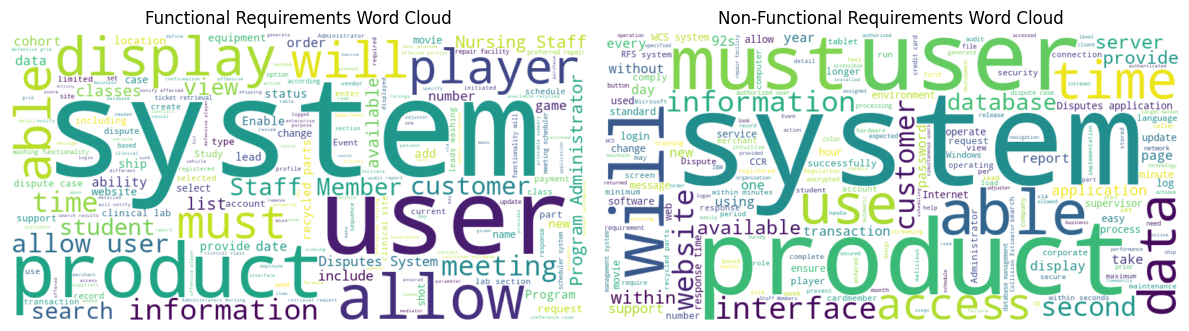

In [ ]:
# Separate the data based on class
functional_text = " ".join(df1[df1['_class_'] == 'F']['RequirementText'])
non_functional_text = " ".join(df1[df1['_class_'] == 'NF']['RequirementText'])

# Generate word clouds for both categories
functional_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(functional_text)
non_functional_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_functional_text)

# Plotting both word clouds
plt.figure(figsize=(12, 6))

# Plot for Functional
plt.subplot(1, 2, 1)
plt.imshow(functional_wordcloud, interpolation='bilinear')
plt.title("Functional Requirements Word Cloud")
plt.axis('off')

# Plot for Non-Functional
plt.subplot(1, 2, 2)
plt.imshow(non_functional_wordcloud, interpolation='bilinear')
plt.title("Non-Functional Requirements Word Cloud")
plt.axis('off')

plt.tight_layout()
plt.show()

### Analyzing the subcategories under Non functional requirements

In [ ]:
df2 = pd.read_csv("/content/New_DataV2.csv")
df2.shape

(1671, 2)

In [ ]:
df2.sample(5)

,Requirement_Text,Label
266,The system shall use symbols and words that ar...,Usability
1015,The software must ensure adherence to the Germ...,Legal
799,The application shall support seamless failove...,Fault Tolerance
825,The application should facilitate easy integra...,Portability
662,The software shall ensure that all user interf...,Usability


In [ ]:
# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=df2.Label.value_counts().index, values=df2.Label.value_counts().values, hole=0.3)])

# Update layout for better visualization
fig.update_layout(
    title="Requirement Types Distribution",
    title_x=0.5,  # Center the title
    annotations=[dict(text='NFRs vs FRs', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()

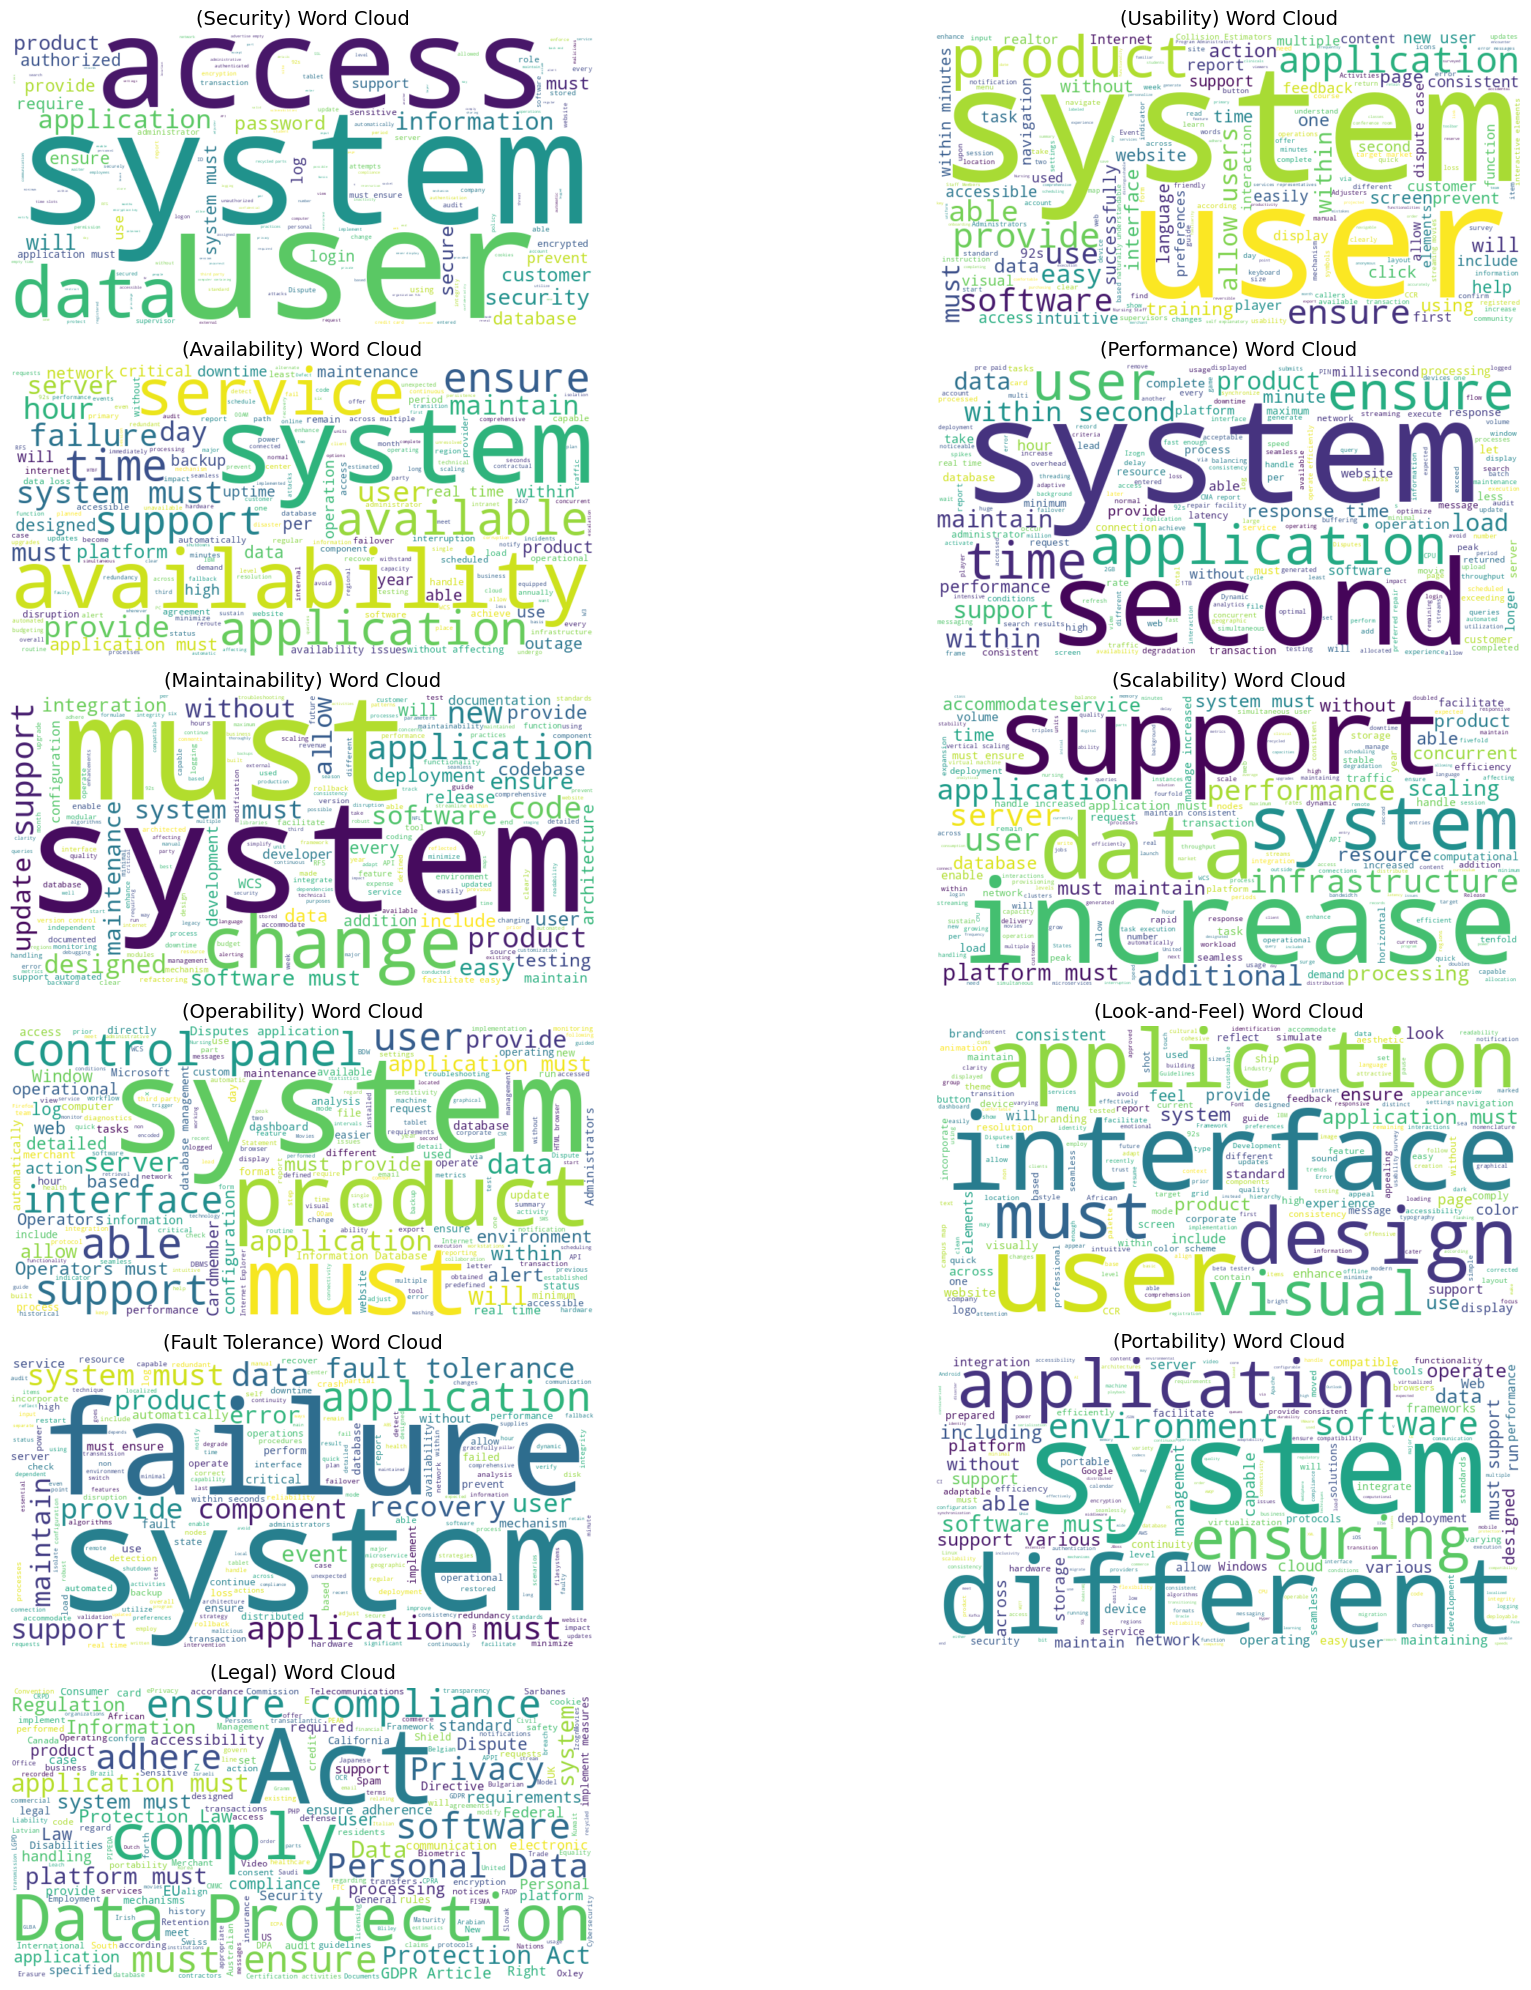

In [ ]:
# Extract unique categories from the '_class_' column
categories = df2['Label'].unique()

# Create a dictionary to store word clouds for each category
category_wordclouds = {}

# Generate word clouds for each category
for category in categories:
    category_text = " ".join(df2[df2['Label'] == category]['Requirement_Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)
    category_wordclouds[category] = wordcloud

# Plotting all word clouds
plt.figure(figsize=(20, 20))
num_categories = len(categories)

for idx, category in enumerate(categories):
    plt.subplot((num_categories + 1) // 2, 2, idx + 1)  # Create subplots dynamically
    plt.imshow(category_wordclouds[category], interpolation='bilinear')
    plt.title(f"({category}) Word Cloud", fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df2 = pd.read_csv("/content/New_DataV2.csv")
df2

,Requirement_Text,Label
0,The system shall prevent malicious attacks inc...,Security
1,The menus of the system must be easily navigab...,Usability
2,The interface shall be easy to use. 90% of use...,Usability
3,The application should provide real-time statu...,Availability
4,The application shall load the homepage within...,Performance
...,...,...
1666,The system must support rollback to a previous...,Maintainability
1667,The meeting scheduler shall be accessed from t...,Operability
1668,The product is expected to integrate with mult...,Operability
1669,The software shall adhere to the Austrian Data...,Legal


In [ ]:
# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=df2.Label.value_counts().index, values=df2.Label.value_counts().values, hole=0.3)])

# Update layout for better visualization
fig.update_layout(
    title="Requirement Types Distribution",
    title_x=0.5,  # Center the title
    annotations=[dict(text='NFRs vs FRs', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()

# Data Processing

### Creating training, test and validation splits function

To train and evaluate our machine learning models effectively, it is crucial to split the dataset into training, validation, and test sets. This allows us to train the model on one portion of the data, validate its performance on another, and finally test it on an unseen set to evaluate its generalization ability.

The function `split_data` is designed to perform this splitting operation. Here's how it works:

The function splits the input DataFrame (`df`) into three sets:
- **Training Set**: This is used to train the model.
- **Validation Set**: This is used during the training process to tune hyperparameters and avoid overfitting.
- **Test Set**: This is used to evaluate the final performance of the model after training.

##### Parameters:
- **df (DataFrame)**: The input DataFrame containing the entire dataset to be split.
- **train_size (float)**: A float value that represents the proportion of data to include in both the training and validation sets. For example, if `train_size = 0.8`, 80% of the data will be used for training and validation, and the remaining 20% will be used for testing.

##### Returns:
- **train_data (DataFrame)**: The DataFrame containing the training data.
- **val_data (DataFrame)**: The DataFrame containing the validation data.
- **test_data (DataFrame)**: The DataFrame containing the test data.

The dataset is first split into two parts: a combined training and validation set (`train_val_data`) and a test set (`test_data`). Then, the `train_val_data` is further split into the actual training and validation sets using the same `train_size` proportion.

By using this method, we ensure that the model is evaluated on data that it has never seen before, which helps in assessing its ability to generalize to new, unseen data.


In [ ]:
def split_data(df, train_size):
    """
    Splits the input DataFrame into training, validation, and test sets.

    Parameters:
    - df (DataFrame): The input DataFrame to be split.
    - train_size (float): The proportion of the data to include in the train and validation sets.

    Returns:
    - train_data (DataFrame): The DataFrame containing the training data.
    - val_data (DataFrame): The DataFrame containing the validation data.
    - test_data (DataFrame): The DataFrame containing the test data.
    """
    train_val_data, test_data = train_test_split(df, train_size=train_size, random_state=19)
    train_data, val_data = train_test_split(train_val_data, train_size=train_size, random_state=19)
    return train_data, val_data, test_data

### Mapping labels to index and index to labels
The function `create_label_dicts` is used to create two dictionaries that map between label IDs and their corresponding labels. These mappings are essential for many machine learning tasks, as models often work with numeric representations of labels rather than their textual forms.

### Function Overview:
- **id2label**: A dictionary that maps label IDs (integer values) to their corresponding label names (strings).
- **label2id**: A dictionary that maps label names (strings) back to their corresponding label IDs (integers).

### Parameters:
- **labels (list)**: A list of unique label names that are used in the classification task.

### Returns:
- **id2label (dict)**: A dictionary where the keys are the label IDs and the values are the corresponding label names.
- **label2id (dict)**: A dictionary where the keys are the label names and the values are the corresponding label IDs.

### How It Works:
- The function uses a list of labels and creates two mappings:
  - **id2label**: This is created by enumerating over the `labels` list, where each unique label is assigned an integer ID.
  - **label2id**: This is simply the reverse mapping of `id2label`, where each label name is mapped back to its corresponding ID.

These mappings are useful when training and evaluating models, as they allow for easy conversion between the label's textual representation and the numeric ID that models typically use.


In [ ]:
def create_label_dicts(labels):
    """
    Creates dictionaries mapping label IDs to labels and vice versa.

    Parameters:
    - labels (list): A list of unique labels.

    Returns:
    - id2label (dict): A dictionary mapping label IDs to labels.
    - label2id (dict): A dictionary mapping labels to label IDs.
    """
    id2label = {id: label for id, label in enumerate(labels)}
    label2id = {label: id for id, label in enumerate(labels)}
    return id2label, label2id

In [ ]:
id2label, label2id = create_label_dicts(df2['Label'].unique().tolist())

In [ ]:
print(id2label)

{0: 'Security', 1: 'Usability', 2: 'Availability', 3: 'Performance', 4: 'Maintainability', 5: 'Scalability', 6: 'Operability', 7: 'Look-and-Feel', 8: 'Fault Tolerance', 9: 'Portability', 10: 'Legal'}


### Text Cleaning and Processing

The functions `preprocess_text` and `process_label` are essential parts of the data preprocessing pipeline for text classification tasks. They ensure that the input text is appropriately cleaned, tokenized, and transformed into a format that can be fed into machine learning models. Here's a breakdown of each function:

### `preprocess_text` Function:
This function preprocesses input text by applying a series of text-cleaning and tokenization steps, making it ready for further processing by machine learning models such as BERT.

**Parameters:**
- **text (str)**: The input text that needs to be preprocessed.
- **tokenizer**: A tokenizer, typically from the BERT model, to convert the preprocessed text into tokens suitable for model input.

**Process Overview:**
1. **Expand Contractions**: The function first expands contractions (e.g., "don't" → "do not") to avoid any inconsistencies in tokenization.
2. **Lowercase Text**: The text is converted to lowercase to standardize the text.
3. **Remove Punctuation, Special Characters, and Numbers**: Non-alphabetic characters are removed using a regular expression to ensure only letters and spaces remain.
4. **Tokenization with spaCy**: The text is processed using a spaCy NLP pipeline to break it into tokens (words).
5. **Lemmatization and Stopword Removal**: Tokens are lemmatized (converted to their base form), and stopwords (commonly used words such as "the" and "and") are removed to focus on meaningful words.
6. **BERT Tokenization**: The cleaned and processed text is passed through the BERT tokenizer, which converts it into tokens suitable for BERT input, including generating token IDs, attention masks, and token type IDs.

**Returns:**
- A dictionary containing the tokenized input text, attention masks, and token type IDs, which are required inputs for BERT-based models.

---

### `process_label` Function:
This function converts a label string (e.g., category name) to its corresponding numerical ID and returns it as a PyTorch tensor, which can be used directly for model training.

**Parameters:**
- **label2id (dict)**: A dictionary mapping label strings to their corresponding numerical IDs.
- **label (str)**: The label string to be converted into a numerical ID.

**Process Overview:**
- The function retrieves the numerical ID corresponding to the input label from the `label2id` dictionary.
- It then converts this ID into a PyTorch tensor, which is the format required for input into a neural network.

**Returns:**
- A PyTorch tensor containing the numerical ID of the label, which can be used for model training or evaluation.

These functions are essential for preparing the data for training, ensuring that both the text and the labels are in the correct format for machine learning models.


In [ ]:
def preprocess_text(text,tokenizer):
    """
    Preprocess the input text by performing:
    - Expansion of contractions
    - Lowercasing
    - Removal of punctuation, special characters, and numbers
    - Stopword removal
    - Lemmatization
    - Bert Tokenizer

    Parameters:
    - text (str): The input text to preprocess
    - nlp: A spaCy NLP pipeline for tokenization, lemmatization, and stopword detection

    Returns:
    - str: Dictionary of input_id,token_type_id and attention_mask
    """
    # Step 1: Expand contractions (e.g., "don't" → "do not")
    text = contractions.fix(text)

    # Step 2: Lowercase the text
    text = text.lower()

    # Step 3: Remove special characters, numbers, and punctuation
    text = re.sub(r"[^a-z\s]", "", text)  # Keep only alphabetic characters and spaces

    # Step 4: Tokenize and process with spaCy
    doc = nlp(text)

    # Step 5: Process tokens - lemmatize, remove stopwords, and filter out empty tokens
    tokens = [
        token.lemma_
        for token in doc
        if not token.is_stop and token.lemma_ not in STOP_WORDS and token.lemma_.strip() != ""
    ]

    # Step 6: Join tokens back into a cleaned text string
    processed_text = " ".join(tokens)

    # Step 7 : Passing the processing text to BERT tokenizer
    return tokenizer(processed_text)


def process_label(label2id, label):
    """
    Converts a label string to its corresponding numerical ID and returns it as a PyTorch tensor.

    Parameters:
    - label2id (dict): A dictionary mapping label strings to their numerical IDs.
    - label (str): The label string to be converted.

    Returns:
    - tensor (torch.Tensor): A PyTorch tensor containing the numerical ID of the label.
    """
    numerical_label = label2id[label]
    tensor = torch.tensor(numerical_label)
    return tensor


### Centralized function for setting up configuration of different transformer models

The `load_model_and_tokenizer` function is responsible for loading a pre-trained model and its corresponding tokenizer for sequence classification tasks. This function makes it easy to switch between different transformer-based models like BERT, RoBERTa, and XLNet, depending on the user's choice.

### `load_model_and_tokenizer` Function:
This function loads both the model and the tokenizer for a specified transformer model, allowing you to easily integrate a pre-trained model for your classification task.

**Parameters:**
- **model_name (str)**: The name of the pre-trained model you want to use (e.g., "bert-base-uncased", "roberta-base", "xlnet-base-cased").
- **num_labels (int)**: The number of unique labels for the classification task. This determines the number of output classes for the model.
- **model_type (str)**: The type of transformer model you want to load. Supported options include "bert", "roberta", and "xlnet".

**Process Overview:**
- The function first checks the `model_type` to determine which specific model to load (BERT, RoBERTa, or XLNet).
- Based on the model type, the function loads the appropriate tokenizer and model using the Hugging Face `from_pretrained` method. This ensures that both the tokenizer and the model are consistent with the specified architecture.
- If an unsupported model type is provided, the function raises a `ValueError`.

**Returns:**
- **tokenizer**: The tokenizer corresponding to the selected model type, which is used to preprocess the input text before passing it to the model.
- **model**: The pre-trained model for sequence classification, ready to be fine-tuned for the specified classification task.

This function is a crucial step in the pipeline, as it allows you to seamlessly integrate different pre-trained transformer models for your task, with minimal code changes.


In [ ]:
def load_model_and_tokenizer(model_name, num_labels, model_type):
    """
    Load the tokenizer and model for sequence classification based on the specified model type.

    Parameters:
    - model_name (str): The name of the pre-trained model to use (e.g., "bert-base-uncased", "roberta-base", "xlnet-base-cased").
    - num_labels (int): Number of labels for the classification task.
    - model_type (str): The type of model to load (e.g., "bert", "roberta", "xlnet").

    Returns:
    - tokenizer: The tokenizer for the specified model type.
    - model: The model for sequence classification for the specified model type.
    """
    if model_type == "bert":
        # Load BERT tokenizer and model
        tokenizer = BertTokenizer.from_pretrained(model_name)
        model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    elif model_type == "roberta":
        # Load RoBERTa tokenizer and model
        tokenizer = RobertaTokenizer.from_pretrained(model_name)
        model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    elif model_type == "xlnet":
        # Load XLNet tokenizer and model
        tokenizer = XLNetTokenizer.from_pretrained(model_name)
        model = XLNetForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    else:
        raise ValueError("Unsupported model type. Please specify 'bert', 'roberta', or 'xlnet'.")

    return tokenizer, model

### Creating data loaders for training (Finetuning)

The `TextDataset` class is a custom PyTorch dataset that is designed for handling text data and corresponding labels, which are essential for training and evaluating machine learning models. This class facilitates easy data handling and transformation during the model training process, especially when working with text classification tasks.

##### `TextDataset` Class:
This class extends PyTorch's `Dataset` class and is tailored for handling text data and labels for tasks such as text classification. It allows for preprocessing and label conversion, enabling efficient data loading during model training.

**Parameters:**
- **df (pd.DataFrame)**: A Pandas DataFrame containing the dataset, which should have columns for both the text data and the corresponding labels.
- **text_column (str)**: The name of the column in the DataFrame that contains the text data.
- **label_column (str)**: The name of the column in the DataFrame that contains the labels.
- **transform (callable, optional)**: A transformation function that is applied to the text data, such as text preprocessing or tokenization.
- **target_transform (callable, optional)**: A function to transform the target labels into their corresponding numerical IDs (e.g., using a dictionary that maps labels to integers).
- **tokenizer**: The tokenizer to be used for converting the text into token IDs suitable for input into a transformer model.
- **label2id**: A dictionary that maps label strings to their corresponding numerical IDs, used for converting labels into a format suitable for training.

**Methods:**
- `__len__(self)`: Returns the length of the dataset, i.e., the number of text samples.
- `__getitem__(self, idx)`: Retrieves the data item at the specified index `idx`. This includes:
  - Extracting the text and label from the DataFrame.
  - Applying any specified transformations to the text, such as preprocessing or tokenization.
  - Converting the label to its corresponding numerical ID using the `target_transform` function.
  - Returning the processed text and label as a dictionary, with the tokenized text and numerical label.

**Returns:**
- A dictionary containing the processed text (usually in tokenized form) and its corresponding numerical label. This dictionary is returned when iterating through the dataset during training or evaluation.

This class is crucial for efficiently loading and transforming text data during the model training process. It allows for easy integration with data pipelines and model training workflows by automating tasks like text preprocessing and label conversion.


In [ ]:
# TextDataset Class
class TextDataset(Dataset):
    def __init__(self, df, text_column, label_column,tokenizer,label2id,transform=None, target_transform=None):
        """
        Args:
            df (pd.DataFrame): Input DataFrame containing text and labels.
            text_column (str): Name of the column containing text data.
            label_column (str): Name of the column containing labels.
            transform (callable, optional): Transformation for text data (e.g., preprocessing).
            target_transform (callable, optional): Transformation for target labels.
        """
        self.data = df
        self.texts = self.data[text_column].tolist()
        self.labels = self.data[label_column].tolist()
        self.transform = transform
        self.target_transform = target_transform
        self.tokenizer = tokenizer
        self.label2id = label2id

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Apply text preprocessing if specified
        if self.transform:
            item = self.transform(text,self.tokenizer)

        # Apply target transformation label to id conversion
        if self.target_transform:
            tensor_label = self.target_transform(self.label2id,label)

        item['label'] = tensor_label
        return item

### Dynamic Paddding function for parallel processing

The `collate_fn_roberta` function is a custom function designed to batch and pad the data appropriately for the RoBERTa model during training or evaluation. In PyTorch, the `collate_fn` function is used in data loaders to merge individual data points into batches. This function ensures that the inputs to the model are formatted correctly and that padding is applied dynamically to ensure that all sequences in the batch have the same length.

##### `collate_fn_roberta` Function:
This function takes a batch of data and processes it to prepare the inputs for a RoBERTa model. It converts lists of token IDs, attention masks, and labels into PyTorch tensors, dynamically pads them to the same length, and stacks the labels. The function then returns the batched and padded data in the appropriate format for model input.

**Parameters:**
- **batch (list)**: A list of dictionaries, where each dictionary contains the following keys:
  - `'input_ids'`: A list of token IDs representing the text.
  - `'attention_mask'`: A list of attention mask values, indicating which tokens should be attended to (1) or ignored (0).
  - `'label'`: The corresponding label for the input text, typically in tensor format.

**Steps:**
1. **Convert lists in the batch to PyTorch tensors**: Each batch element contains a dictionary. The `input_ids` and `attention_mask` are converted to PyTorch tensors.
2. **Pad the tensors dynamically**: The `input_ids` and `attention_mask` tensors are padded to the same length using `pad_sequence` to ensure uniform input size across the batch. Padding is done with a value of `0`.
3. **Stack the labels**: The labels are already in tensor format and are stacked into a single tensor using `torch.stack`.
4. **Return the batched tensors**: The function returns a dictionary containing:
   - `'input_ids'`: A tensor of padded token IDs.
   - `'attention_mask'`: A tensor of padded attention mask values.
   - `'labels'`: A tensor of stacked labels.

**Returns:**
- A dictionary containing:
  - `'input_ids'`: A tensor of padded input IDs.
  - `'attention_mask'`: A tensor of padded attention masks.
  - `'labels'`: A tensor of stacked labels.

This function is essential for creating properly formatted batches of data for training or evaluation in a sequence classification task using the RoBERTa model. It ensures that the data is efficiently padded and prepared for the model's input requirements.


In [ ]:
def collate_fn_roberta(batch):
    """
    Collate function for batching data.

    This function takes a batch of data as input, converts the lists of input_ids, attention_masks, and labels into PyTorch tensors, dynamically pads them to the same length, and stacks the labels. The padded tensors and stacked labels are then returned as a dictionary.

    Args:
        batch (list): A list of dictionaries, each containing 'input_ids', 'attention_mask', and 'label' as keys.

    Returns:
        dict: A dictionary containing the batched and padded 'input_ids', 'attention_mask', and stacked 'labels' as tensors.
    """
    # Convert lists in the batch to PyTorch tensors
    input_ids = [torch.tensor(item['input_ids']) for item in batch]
    attention_masks = [torch.tensor(item['attention_mask']) for item in batch]
    labels = [item['label'] for item in batch]  # Already a tensor in your case

    # Pad the tensors dynamically
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=0)
    attention_masks = pad_sequence(attention_masks, batch_first=True, padding_value=0)

    # Stack the labels (already tensors)
    labels = torch.stack(labels)

    # Return batched tensors
    return {
        'input_ids': input_ids,
        'attention_mask': attention_masks,
        'labels': labels
    }

In [ ]:
def collate_fn_bert_xlnet(batch):
    """
    Collate function for batching data.

    This function takes a batch of data as input, converts the lists of input_ids, attention_masks, and labels into PyTorch tensors, dynamically pads them to the same length, and stacks the labels. The padded tensors and stacked labels are then returned as a dictionary.

    Args:
        batch (list): A list of dictionaries, each containing 'input_ids', 'attention_mask', and 'label' as keys.

    Returns:
        dict: A dictionary containing the batched and padded 'input_ids', 'attention_mask', and stacked 'labels' as tensors.
    """
    # Convert lists in the batch to PyTorch tensors
    input_ids = [torch.tensor(item['input_ids']) for item in batch]
    attention_masks = [torch.tensor(item['attention_mask']) for item in batch]
    token_type_ids = [torch.tensor(item['token_type_ids']) for item in batch]
    labels = [item['label'] for item in batch]  # Already a tensor in your case

    # Pad the tensors dynamically
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=0)
    attention_masks = pad_sequence(attention_masks, batch_first=True, padding_value=0)
    token_type_ids = pad_sequence(token_type_ids, batch_first=True, padding_value=0)

    # Stack the labels (already tensors)
    labels = torch.stack(labels)

    # Return batched tensors
    return {
        'input_ids': input_ids,
        'attention_mask': attention_masks,
        'token_type_ids': token_type_ids,
        'labels': labels
    }

# Model training Setup

### Defining the Early stopping to prevent overfitting

The `EarlyStopping` class is designed to monitor the validation loss during model training and stop training early if the validation loss does not improve over a specified number of epochs. Early stopping is a regularization technique that helps to prevent overfitting by halting the training process when the model performance on the validation set starts to deteriorate.

##### `EarlyStopping` Class:
This class tracks the best validation loss, and if the loss does not improve for a given number of epochs (`patience`), it stops the training early. The model weights corresponding to the best validation loss are saved, and can later be loaded for evaluation or further training.

**Attributes:**
- **`patience (int)`**: The number of epochs with no improvement in validation loss after which training will be stopped. Default is 3.
- **`delta (float)`**: The minimum change in the validation loss to qualify as an improvement. If the improvement in loss is less than `delta`, the counter is incremented. Default is 0.
- **`save_path (str)`**: The file path where the best model will be saved. Default is "artifacts/best_model_xlnet.pt".
- **`best_loss (float)`**: Tracks the best (lowest) validation loss observed so far. Initialized to infinity.
- **`counter (int)`**: A counter that tracks how many epochs the validation loss has not improved.
- **`early_stop (bool)`**: A flag that indicates whether early stopping should be triggered.
- **`best_model (model)`**: A variable to hold the model with the best performance based on validation loss.

**Methods:**

1. **`__init__(self, patience=3, delta=0, save_path="artifacts/best_model_xlnet.pt")`**:
   - Initializes the early stopping parameters (`patience`, `delta`, `save_path`).
   - Sets up attributes to track the best validation loss, counter, and the early stopping condition.

2. **`__call__(self, val_loss, model)`**:
   - This method is called after every validation step to evaluate whether training should continue or stop.
   - If the validation loss is lower than the best loss by more than the specified `delta`, the best loss is updated, and the model is saved.
   - If the validation loss does not improve, the counter is incremented. If the counter exceeds the `patience` threshold, early stopping is triggered.

3. **`save_model(self, model)`**:
   - Saves the model’s state dictionary (weights) to the specified `save_path`.

4. **`load_best_model(self, model)`**:
   - Loads the model state from the best model saved during training, restoring the model to the state with the best validation loss.

**Usage:**
This class is useful in training deep learning models where overfitting is a concern. By halting training when no improvement is observed, it prevents unnecessary training cycles and ensures that the model does not start to overfit the training data. The saved best model can be loaded and used for evaluation or deployment.

**Returns:**
The class does not return any values directly. Instead, it modifies the model training loop by stopping early based on validation performance and saving the best model for future use.


In [ ]:
class EarlyStopping:
    def __init__(self, patience=3, delta=0, save_path="artifacts/best_model_xlnet.pt"):
        self.patience = patience
        self.delta = delta
        self.save_path = save_path
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False
        self.best_model = None

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
            self.save_model(model)
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

    def save_model(self, model):
        torch.save(model.state_dict(), self.save_path)

    def load_best_model(self, model):
        model.load_state_dict(torch.load(self.save_path))


### Defining train, test and validation loops

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA device for training.")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS device for training.")
else:
    device = torch.device("cpu")
    print("Neither CUDA nor MPS is available. Falling back to CPU.")

Using CUDA device for training.


The provided functions constitute the core training, validation, and testing loops for a machine learning model, incorporating early stopping to prevent overfitting and ensure efficient model training. Here's a breakdown of each function and its purpose:

##### Training Loop (`train_loop`):
The `train_loop` function is responsible for iterating over the training dataset, performing forward and backward passes, and updating the model's weights. It also calculates the F1 score for training performance and logs progress using Weights and Biases (WandB). Additionally, if early stopping is enabled, it evaluates the validation loss to determine whether training should be halted early.

- **Training Process**:
  - The model is set to training mode.
  - For each batch, the inputs are passed through the model to calculate the logits (predictions), and the loss is computed using the specified loss function.
  - Backpropagation is performed, and the model weights are updated using the optimizer.
  - The F1 score for the training data is computed and logged.
  
- **Early Stopping**:
  - If an `early_stopping` instance is passed, the function evaluates the validation loss and triggers early stopping if the loss doesn't improve after a predefined number of epochs (`patience`).
  
- **Logging**:
  - The training loss and F1 score are logged to WandB for real-time monitoring.

- **Returns**:
  - Returns `True` if early stopping is triggered (indicating training should stop), and `False` otherwise.

##### Validation Loop (`evaluate_validation_loss`):
The `evaluate_validation_loss` function computes the validation loss and accuracy for the model after each epoch. It sets the model to evaluation mode, performs a forward pass on the validation dataset, and computes key metrics.

- **Evaluation Process**:
  - The model is set to evaluation mode to ensure no updates are made to the model during validation.
  - The function computes the loss and F1 score, as well as the accuracy, across the entire validation dataset.
  
- **Logging**:
  - The validation loss, accuracy, and F1 score are logged to WandB for real-time tracking.
  
- **Returns**:
  - Returns the average validation loss for the epoch.

##### Test Loop (`test_loop`):
The `test_loop` function evaluates the model's performance on the test dataset, providing final metrics after training is completed. It computes the test loss, accuracy, and F1 score, offering a final evaluation of the model's generalization ability.

- **Testing Process**:
  - The model is set to evaluation mode to prevent changes during testing.
  - The test loss is computed by averaging the loss across all test batches.
  - The accuracy and F1 score are also computed for final evaluation.
  
- **Logging**:
  - The test accuracy, loss, and F1 score are logged to WandB for final evaluation tracking.
  
- **Outputs**:
  - The test accuracy and F1 score are printed, and a log of these metrics is made to WandB.

##### Early Stopping:
Early stopping helps mitigate overfitting by stopping training if the model's performance on the validation set ceases to improve after a certain number of epochs. The `train_loop` integrates this feature, calling the `early_stopping` function to decide whether training should be halted early.

##### Conclusion:
This set of functions implements a comprehensive training workflow, including:
- Model training with backpropagation.
- Early stopping to avoid overfitting.
- Validation and test evaluation to monitor performance.
- Real-time logging via WandB for progress tracking.

These loops enable efficient model training and provide metrics that help assess the model's generalization capability on unseen data.


In [ ]:
# Training loop with early stopping
def train_loop(dataloader, model, loss_fn, optimizer, val_loader, epoch, early_stopping=None):
    model.train()  # Set model to training mode
    size = len(dataloader.dataset)

    all_preds = []  # List to store predictions
    all_labels = []  # List to store true labels

    for batch, batch_data in enumerate(dataloader):
        # Unpack inputs for BERT
        input_ids = batch_data["input_ids"].to(device)
        attention_mask = batch_data["attention_mask"].to(device)
        labels = batch_data["labels"].to(device)

        # Compute prediction and loss
        logits = model(input_ids, attention_mask=attention_mask).logits  # Forward pass
        loss = loss_fn(logits, labels)  # Compute loss

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store predictions and labels for metrics computation
        all_preds.extend(logits.argmax(1).cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Log progress and loss
        if batch % 100 == 0:
            loss_value = loss.item()
            current = batch * len(input_ids)
            print(f"loss: {loss_value:>7f}  [{current:>5d}/{size:>5d}]")
            wandb.log({
                "train_loss": loss_value,
                "epoch": epoch,
                "step": current,
            })

    # Compute F1 score
    train_f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"Training F1 Score: {train_f1:.4f}")
    wandb.log({"train_f1_score": train_f1, "epoch": epoch})

    # Evaluate validation loss for early stopping
    if early_stopping:
        val_loss = evaluate_validation_loss(model, loss_fn, val_loader, epoch)
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            early_stopping.load_best_model(model)
            return True  # Stop training early
    return False

# Validation loop for loss and accuracy evaluation
def evaluate_validation_loss(model, loss_fn, val_loader, epoch):
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch_data in val_loader:
            input_ids = batch_data["input_ids"].to(device)
            attention_mask = batch_data["attention_mask"].to(device)
            labels = batch_data["labels"].to(device)

            logits = model(input_ids, attention_mask=attention_mask).logits
            val_loss += loss_fn(logits, labels).item()

            all_preds.extend(logits.argmax(1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            correct += (logits.argmax(1) == labels).type(torch.float).sum().item()

    val_loss /= len(val_loader)
    accuracy = 100 * correct / len(val_loader.dataset)
    val_f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f"Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%, F1 Score: {val_f1:.4f}")
    wandb.log({
        "validation_loss": val_loss,
        "validation_accuracy": accuracy,
        "validation_f1_score": val_f1,
        "epoch": epoch
    })

    return val_loss

# Test loop for model evaluation
def test_loop(dataloader, model, loss_fn, epoch):
    model.eval()  # Set model to evaluation mode
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    test_loss, correct = 0, 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch_data in dataloader:
            input_ids = batch_data["input_ids"].to(device)
            attention_mask = batch_data["attention_mask"].to(device)
            labels = batch_data["labels"].to(device)

            logits = model(input_ids, attention_mask=attention_mask).logits
            test_loss += loss_fn(logits, labels).item()

            all_preds.extend(logits.argmax(1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            correct += (logits.argmax(1) == labels).type(torch.float).sum().item()

    test_loss /= num_batches
    accuracy = 100 * correct / size
    test_f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f"Test Error: \n Accuracy: {accuracy:>0.1f}%, Avg loss: {test_loss:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")

    wandb.log({
        "test_accuracy": accuracy,
        "test_loss": test_loss,
        "test_f1_score": test_f1,
        "epoch": epoch
    })


# Initializing the Model training (Stage 1)

### Initializing the models

In [ ]:
# Define key parameters
num_labels = 2  # Number of classes (e.g., binary classification)
learning_rate = 2e-5  # Typical fine-tuning learning rate for BERT
epochs = 50  # Number of training epochs
patience = 10  # Early stopping patience
min_delta = 0.001  # Minimum improvement for early stopping


# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

In [ ]:
roberta_model_name = "roberta-base"
bert_model_name = "bert-base-uncased"
xlnet_model_name = "xlnet-base-cased"

# Setting up the different models and tokenizers
bert_tokenizer, bert_model = load_model_and_tokenizer(bert_model_name, 2, "bert")
roberta_tokenizer, roberta_model = load_model_and_tokenizer(roberta_model_name, 2, "roberta")
xlnet_tokenizer, xlnet_model = load_model_and_tokenizer(xlnet_model_name, 2, "xlnet")

# Moving modesl to GPU
bert_model = bert_model.to(device)
roberta_model = roberta_model.to(device)
xlnet_model = xlnet_model.to(device)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
# Creating train test and validation data
train_data,test_data,val_data = split_data(df1,0.8)
print(train_data.shape,val_data.shape,test_data.shape)

labels_c1 = df1['_class_'].unique().tolist()
id2label_c1, label2id_c1 = create_label_dicts(labels_c1)

(620, 2) (194, 2) (155, 2)


### BERT model training

In [43]:
# Creating the datasets and dataloaders
train_dataset = TextDataset(train_data,'RequirementText','_class_',bert_tokenizer,label2id_c1,preprocess_text,process_label)
test_dataset = TextDataset(test_data,'RequirementText','_class_',bert_tokenizer,label2id_c1,preprocess_text,process_label)
valid_dataset = TextDataset(val_data,'RequirementText','_class_',bert_tokenizer,label2id_c1,preprocess_text,process_label)

train_dataloader = DataLoader(train_dataset, batch_size=16, collate_fn=collate_fn_bert_xlnet, shuffle=True)
val_dataloader = DataLoader(valid_dataset, batch_size=16, collate_fn=collate_fn_bert_xlnet, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=16, collate_fn=collate_fn_bert_xlnet, shuffle=False)

In [ ]:
wandb.init(
    project="Stage_1_Finetuning",
    config={
        "learning_rate": 2e-5,
        "batch_size": 16,
        "epochs": 50,
        "optimizer": "AdamW",
        "model_name": "bert-base-uncased",
        "num_labels": 2,
        "pretrained_model": "bert-base-uncased",
        "train_dataset_size": len(train_dataloader) * 16,
        "test_dataset_size": len(test_dataloader) * 16,
        "validation_dataset_size": len(val_dataloader) * 16,
        "loss_fn": "CrossEntropyLoss",
        "device": device,
    },
    reinit=True
)

In [ ]:
# Early stopping
optimizer = AdamW(bert_model.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(patience=patience, delta=min_delta, save_path="artifacts/Phase1_Classification/bert.pt")

# Training loop with early stopping
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    print("-" * 30)

    # Train the model
    stop_early = train_loop(train_dataloader, bert_model, loss_fn, optimizer, val_dataloader, epoch, early_stopping)

    if stop_early:
        print("Early stopping triggered. Stopping training.")
        break

    # Test the model after each epoch
    test_loop(test_dataloader, bert_model, loss_fn, epoch)

print("Training complete!")

/Users/yuvrajsingh/Desktop/AI Development/Freelance/Software_Classification/.venv/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Epoch 1/50
------------------------------
loss: 0.739028  [    0/  620]
Training F1 Score: 0.6306
Validation Loss: 0.4310, Accuracy: 81.96%, F1 Score: 0.8193
Test Error: 
 Accuracy: 72.3%, Avg loss: 0.5554
Test F1 Score: 0.7223

Epoch 2/50
------------------------------
loss: 0.434702  [    0/  620]
Training F1 Score: 0.8248
Validation Loss: 0.3730, Accuracy: 80.93%, F1 Score: 0.8067
Test Error: 
 Accuracy: 77.4%, Avg loss: 0.4639
Test F1 Score: 0.7684

Epoch 3/50
------------------------------
loss: 0.370505  [    0/  620]
Training F1 Score: 0.8966
Validation Loss: 0.2732, Accuracy: 90.21%, F1 Score: 0.9021
Test Error: 
 Accuracy: 78.7%, Avg loss: 0.5027
Test F1 Score: 0.7863

Epoch 4/50
------------------------------
loss: 0.070783  [    0/  620]
Training F1 Score: 0.9435
Validation Loss: 0.2955, Accuracy: 90.72%, F1 Score: 0.9072
Test Error: 
 Accuracy: 80.0%, Avg loss: 0.5474
Test F1 Score: 0.7991

Epoch 5/50
------------------------------
loss: 0.041476  [    0/  620]
Training F1

/var/folders/89/f812xzx91rz99l675pn4yx3r0000gn/T/ipykernel_67337/2625115131.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(self.save_p

Early stopping triggered. Stopping training.
Training complete!


### Roberta Model training

In [ ]:
# Creating the datasets and dataloaders
train_dataset = TextDataset(train_data,'RequirementText','_class_',roberta_tokenizer,label2id_c1,preprocess_text,process_label)
test_dataset = TextDataset(test_data,'RequirementText','_class_',roberta_tokenizer,label2id_c1,preprocess_text,process_label)
valid_dataset = TextDataset(val_data,'RequirementText','_class_',roberta_tokenizer,label2id_c1,preprocess_text,process_label)

train_dataloader = DataLoader(train_dataset, batch_size=16, collate_fn=collate_fn_roberta, shuffle=True)
val_dataloader = DataLoader(valid_dataset, batch_size=16, collate_fn=collate_fn_roberta, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=16, collate_fn=collate_fn_roberta, shuffle=False)

In [ ]:
wandb.init(
    project="Stage_1_Finetuning",
    config={
        "learning_rate": 2e-5,
        "batch_size": 16,
        "epochs": 50,
        "optimizer": "AdamW",
        "model_name": "roberta-base-uncased",
        "num_labels": 2,
        "pretrained_model": "roberta-base-uncased",
        "train_dataset_size": len(train_dataloader) * 16,
        "test_dataset_size": len(test_dataloader) * 16,
        "validation_dataset_size": len(val_dataloader) * 16,
        "loss_fn": "CrossEntropyLoss",
        "device": device,
    },
    reinit=True
)

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇██
step,▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,▁▅▆▇▂▆█▅▆▇██
test_f1_score,▁▄▆▇▂▆█▅▆▇██
test_loss,▃▁▂▃▇▆▅█▇▇█▇
train_f1_score,▁▅▆▇█████████
train_loss,█▅▄▂▁▁▁▁▁▁▁▁▁
validation_accuracy,▂▁▇█▅▆█▆▇█▇▇▇
validation_f1_score,▂▁▇█▅▆█▆▇█▇▇▇
validation_loss,█▅▁▂▇▆▂▆▅▄▆▆▆
epoch,12


In [ ]:
# Early stopping
optimizer = AdamW(roberta_model.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(patience=patience, delta=min_delta, save_path="artifacts/Phase1_Classification/roberta.pt")

# Training loop with early stopping
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    print("-" * 30)

    # Train the model
    stop_early = train_loop(train_dataloader, roberta_model, loss_fn, optimizer, val_dataloader, epoch, early_stopping)

    if stop_early:
        print("Early stopping triggered. Stopping training.")
        break

    # Test the model after each epoch
    test_loop(test_dataloader, roberta_model, loss_fn, epoch)

print("Training complete!")

/Users/yuvrajsingh/Desktop/AI Development/Freelance/Software_Classification/.venv/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Epoch 1/50
------------------------------
loss: 0.680229  [    0/  620]
Training F1 Score: 0.4658
Validation Loss: 0.5982, Accuracy: 53.09%, F1 Score: 0.3791
Test Error: 
 Accuracy: 51.0%, Avg loss: 0.6407
Test F1 Score: 0.3511

Epoch 2/50
------------------------------
loss: 0.641813  [    0/  620]
Training F1 Score: 0.7750
Validation Loss: 0.3510, Accuracy: 85.05%, F1 Score: 0.8504
Test Error: 
 Accuracy: 76.8%, Avg loss: 0.4730
Test F1 Score: 0.7665

Epoch 3/50
------------------------------
loss: 0.197432  [    0/  620]
Training F1 Score: 0.9015
Validation Loss: 0.8856, Accuracy: 70.62%, F1 Score: 0.6829
Test Error: 
 Accuracy: 67.1%, Avg loss: 1.1047
Test F1 Score: 0.6353

Epoch 4/50
------------------------------
loss: 0.617800  [    0/  620]
Training F1 Score: 0.9275
Validation Loss: 0.3415, Accuracy: 87.11%, F1 Score: 0.8711
Test Error: 
 Accuracy: 81.3%, Avg loss: 0.5875
Test F1 Score: 0.8127

Epoch 5/50
------------------------------
loss: 0.031203  [    0/  620]
Training F1

/var/folders/89/f812xzx91rz99l675pn4yx3r0000gn/T/ipykernel_67337/2625115131.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(self.save_p

Early stopping triggered. Stopping training.
Training complete!


### XLnet Model training

In [ ]:
# Creating the datasets and dataloaders
train_dataset = TextDataset(train_data,'RequirementText','_class_',xlnet_tokenizer,label2id_c1,preprocess_text,process_label)
test_dataset = TextDataset(test_data,'RequirementText','_class_',xlnet_tokenizer,label2id_c1,preprocess_text,process_label)
valid_dataset = TextDataset(val_data,'RequirementText','_class_',xlnet_tokenizer,label2id_c1,preprocess_text,process_label)

train_dataloader = DataLoader(train_dataset, batch_size=16, collate_fn=collate_fn_bert_xlnet, shuffle=True)
val_dataloader = DataLoader(valid_dataset, batch_size=16, collate_fn=collate_fn_bert_xlnet, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=16, collate_fn=collate_fn_bert_xlnet, shuffle=False)

In [ ]:
wandb.init(
    project="Stage_1_Finetuning",
    config={
        "learning_rate": 2e-5,
        "batch_size": 16,
        "epochs": 50,
        "optimizer": "AdamW",
        "model_name": "xlnet-base-uncased",
        "num_labels": 2,
        "pretrained_model": "xlnet-base-uncased",
        "train_dataset_size": len(train_dataloader) * 16,
        "test_dataset_size": len(test_dataloader) * 16,
        "validation_dataset_size": len(val_dataloader) * 16,
        "loss_fn": "CrossEntropyLoss",
        "device": device,
    },
    reinit=True
)

epoch,▁▁▁▁▁▂▂▂▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▅▆▆▇▇▇▇▇▇▇▇▇█
step,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,▁▆▄▇▇▇██▇█▇███
test_f1_score,▁▇▅█████▇█▇███
test_loss,▂▁▆▂▂▃▂▃▄▃█▄▄▄
train_f1_score,▁▅▇▇███████████
train_loss,██▃▇▁▁▁▁▁▁▁▄▁▁▁
validation_accuracy,▁▇▄▇████▇█▆█▇██
validation_f1_score,▁▇▅█████▇█▆████
validation_loss,▄▁▆▁▁▂▁▂▃▂█▂▃▂▃
epoch,14


In [ ]:
# Early stopping
optimizer = AdamW(xlnet_model.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(patience=patience, delta=min_delta, save_path="artifacts/Phase1_Classification/xlnet.pt")

# Training loop with early stopping
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    print("-" * 30)

    # Train the model
    stop_early = train_loop(train_dataloader, xlnet_model, loss_fn, optimizer, val_dataloader, epoch, early_stopping)

    if stop_early:
        print("Early stopping triggered. Stopping training.")
        break

    # Test the model after each epoch
    test_loop(test_dataloader, xlnet_model, loss_fn, epoch)

print("Training complete!")

/Users/yuvrajsingh/Desktop/AI Development/Freelance/Software_Classification/.venv/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Epoch 1/50
------------------------------
loss: 0.694952  [    0/  620]
Training F1 Score: 0.5544
Validation Loss: 0.6923, Accuracy: 52.06%, F1 Score: 0.3565
Test Error: 
 Accuracy: 50.3%, Avg loss: 0.7018
Test F1 Score: 0.3369

Epoch 2/50
------------------------------
loss: 0.635910  [    0/  620]
Training F1 Score: 0.5096
Validation Loss: 0.6833, Accuracy: 56.70%, F1 Score: 0.4902
Test Error: 
 Accuracy: 54.8%, Avg loss: 0.7037
Test F1 Score: 0.4352

Epoch 3/50
------------------------------
loss: 0.687010  [    0/  620]
Training F1 Score: 0.6467
Validation Loss: 0.5233, Accuracy: 76.29%, F1 Score: 0.7593
Test Error: 
 Accuracy: 71.0%, Avg loss: 0.6047
Test F1 Score: 0.7059

Epoch 4/50
------------------------------
loss: 0.755199  [    0/  620]
Training F1 Score: 0.7907
Validation Loss: 0.4052, Accuracy: 80.93%, F1 Score: 0.8082
Test Error: 
 Accuracy: 75.5%, Avg loss: 0.5711
Test F1 Score: 0.7537

Epoch 5/50
------------------------------
loss: 0.483616  [    0/  620]
Training F1

/var/folders/89/f812xzx91rz99l675pn4yx3r0000gn/T/ipykernel_67337/2625115131.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(self.save_p

Early stopping triggered. Stopping training.
Training complete!


# Stage 2 model training

In [ ]:
# Define key parameters
num_labels = 11  # Number of classes (e.g., binary classification)
learning_rate = 2e-5  # Typical fine-tuning learning rate for BERT
epochs = 50  # Number of training epochs
patience = 10  # Early stopping patience
min_delta = 0.001  # Minimum improvement for early stopping

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

In [ ]:
roberta_model_name = "roberta-base"
bert_model_name = "bert-base-uncased"
xlnet_model_name = "xlnet-base-cased"

# Setting up the different models and tokenizers
bert_tokenizer, bert_model = load_model_and_tokenizer(bert_model_name, 11, "bert")
roberta_tokenizer, roberta_model = load_model_and_tokenizer(roberta_model_name, 11, "roberta")
xlnet_tokenizer, xlnet_model = load_model_and_tokenizer(xlnet_model_name, 11, "xlnet")

# Moving modesl to GPU
bert_model = bert_model.to(device)
roberta_model = roberta_model.to(device)
xlnet_model = xlnet_model.to(device)

In [45]:
# Creating train test and validation data
train_data,test_data,val_data = split_data(df2,0.8)
print(train_data.shape,val_data.shape,test_data.shape)

labels_c2 = df2['Label'].unique().tolist()
id2label_c2, label2id_c2 = create_label_dicts(labels_c2)

(1068, 2) (335, 2) (268, 2)


### BERT training

In [46]:
# Creating the datasets and dataloaders
train_dataset = TextDataset(train_data,'Requirement_Text','Label',bert_tokenizer,label2id_c2,preprocess_text,process_label)
test_dataset = TextDataset(test_data,'Requirement_Text','Label',bert_tokenizer,label2id_c2,preprocess_text,process_label)
valid_dataset = TextDataset(val_data,'Requirement_Text','Label',bert_tokenizer,label2id_c2,preprocess_text,process_label)

train_dataloader = DataLoader(train_dataset, batch_size=16, collate_fn=collate_fn_bert_xlnet, shuffle=True)
val_dataloader = DataLoader(valid_dataset, batch_size=16, collate_fn=collate_fn_bert_xlnet, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=16, collate_fn=collate_fn_bert_xlnet, shuffle=False)

In [ ]:
wandb.init(
    project="Stage_2_Trainin",
    config={
        "learning_rate": 2e-5,
        "batch_size": 16,
        "epochs": 50,
        "optimizer": "AdamW",
        "model_name": "bert-base-uncased",
        "num_labels": 11,
        "pretrained_model": "bert-base-uncased",
        "train_dataset_size": len(train_dataloader) * 16,
        "test_dataset_size": len(test_dataloader) * 16,
        "validation_dataset_size": len(val_dataloader) * 16,
        "loss_fn": "CrossEntropyLoss",
        "device": device,
    },
    reinit=True
)

epoch,▁▁▁
step,▁
train_f1_score,▁
train_loss,▁
validation_accuracy,▁
validation_f1_score,▁
validation_loss,▁
epoch,0
step,0
train_f1_score,0.50801
train_loss,1.92215


In [ ]:
# Early stopping
optimizer = AdamW(bert_model.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(patience=patience, delta=min_delta, save_path="../artifacts/Phase2_Classification/bert.pt")

# Training loop with early stopping
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    print("-" * 30)

    # Train the model
    stop_early = train_loop(train_dataloader, bert_model, loss_fn, optimizer, val_dataloader, epoch, early_stopping)

    if stop_early:
        print("Early stopping triggered. Stopping training.")
        break

    # Test the model after each epoch
    test_loop(test_dataloader, bert_model, loss_fn, epoch)

print("Training complete!")


/Users/yuvrajsingh/Desktop/AI Development/Freelance/Software_Classification/.venv/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning




Epoch 1/50
------------------------------
loss: 2.333500  [    0/ 1068]
Training F1 Score: 0.0914
Validation Loss: 2.3249, Accuracy: 13.73%, F1 Score: 0.0405
Test Error: 
 Accuracy: 13.8%, Avg loss: 2.3103
Test F1 Score: 0.0392

Epoch 2/50
------------------------------
loss: 2.203087  [    0/ 1068]
Training F1 Score: 0.2929
Validation Loss: 1.8156, Accuracy: 51.94%, F1 Score: 0.4724
Test Error: 
 Accuracy: 48.5%, Avg loss: 1.8014
Test F1 Score: 0.4212

Epoch 3/50
------------------------------
loss: 1.701751  [    0/ 1068]
Training F1 Score: 0.5907
Validation Loss: 1.2402, Accuracy: 65.37%, F1 Score: 0.6245
Test Error: 
 Accuracy: 63.1%, Avg loss: 1.2521
Test F1 Score: 0.5883

Epoch 4/50
------------------------------
loss: 0.950229  [    0/ 1068]
Training F1 Score: 0.7703
Validation Loss: 0.9758, Accuracy: 71.04%, F1 Score: 0.6941
Test Error: 
 Accuracy: 68.7%, Avg loss: 1.0305
Test F1 Score: 0.6710

Epoch 5/50
------------------------------
loss: 0.432428  [    0/ 1068]
Training F1

/var/folders/89/f812xzx91rz99l675pn4yx3r0000gn/T/ipykernel_74858/2625115131.py:25: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Early stopping triggered. Stopping training.
Training complete!


### Roberta training

In [ ]:
# Creating the datasets and dataloaders
train_dataset = TextDataset(train_data,'Requirement_Text','Label',roberta_tokenizer,label2id_c2,preprocess_text,process_label)
test_dataset = TextDataset(test_data,'Requirement_Text','Label',roberta_tokenizer,label2id_c2,preprocess_text,process_label)
valid_dataset = TextDataset(val_data,'Requirement_Text','Label',roberta_tokenizer,label2id_c2,preprocess_text,process_label)

train_dataloader = DataLoader(train_dataset, batch_size=16, collate_fn=collate_fn_roberta, shuffle=True)
val_dataloader = DataLoader(valid_dataset, batch_size=16, collate_fn=collate_fn_roberta, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=16, collate_fn=collate_fn_roberta, shuffle=False)

In [ ]:
wandb.init(
    project="Stage_2_Trainin",
    config={
        "learning_rate": 2e-5,
        "batch_size": 16,
        "epochs": 50,
        "optimizer": "AdamW",
        "model_name": "roberta-base-uncased",
        "num_labels": 11,
        "pretrained_model": "roberta-base-uncased",
        "train_dataset_size": len(train_dataloader) * 16,
        "test_dataset_size": len(test_dataloader) * 16,
        "validation_dataset_size": len(val_dataloader) * 16,
        "loss_fn": "CrossEntropyLoss",
        "device": device,
    },
    reinit=True
)

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇█████
step,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,▁▅▇▇▇███████████
test_f1_score,▁▅▆▇▇███████████
test_loss,█▆▃▂▁▁▁▁▁▁▂▂▂▂▂▂
train_f1_score,▁▃▅▆▇████████████
train_loss,██▆▄▂▂▂▂▁▁▁▂▁▁▁▁▁
validation_accuracy,▁▅▆▇█████████████
validation_f1_score,▁▅▆▇█████████████
validation_loss,█▆▃▂▁▁▁▁▁▁▂▂▂▂▂▂▂
epoch,16


In [ ]:
# Early stopping
optimizer = AdamW(roberta_model.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(patience=patience, delta=min_delta, save_path="../artifacts/Phase2_Classification/roberta.pt")

# Training loop with early stopping
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    print("-" * 30)

    # Train the model
    stop_early = train_loop(train_dataloader, roberta_model, loss_fn, optimizer, val_dataloader, epoch, early_stopping)

    if stop_early:
        print("Early stopping triggered. Stopping training.")
        break

    # Test the model after each epoch
    test_loop(test_dataloader, roberta_model, loss_fn, epoch)

print("Training complete!")

/Users/yuvrajsingh/Desktop/AI Development/Freelance/Software_Classification/.venv/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning




Epoch 1/50
------------------------------
loss: 2.427536  [    0/ 1068]
Training F1 Score: 0.2563
Validation Loss: 1.3823, Accuracy: 60.30%, F1 Score: 0.5577
Test Error: 
 Accuracy: 57.1%, Avg loss: 1.4034
Test F1 Score: 0.5289

Epoch 2/50
------------------------------
loss: 1.475949  [    0/ 1068]
Training F1 Score: 0.6719
Validation Loss: 0.9190, Accuracy: 72.24%, F1 Score: 0.7128
Test Error: 
 Accuracy: 67.2%, Avg loss: 0.9736
Test F1 Score: 0.6470

Epoch 3/50
------------------------------
loss: 1.023096  [    0/ 1068]
Training F1 Score: 0.7919
Validation Loss: 0.7730, Accuracy: 76.42%, F1 Score: 0.7630
Test Error: 
 Accuracy: 76.9%, Avg loss: 0.8030
Test F1 Score: 0.7689

Epoch 4/50
------------------------------
loss: 0.362028  [    0/ 1068]
Training F1 Score: 0.8579
Validation Loss: 0.7533, Accuracy: 78.21%, F1 Score: 0.7771
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.8251
Test F1 Score: 0.7387

Epoch 5/50
------------------------------
loss: 0.398065  [    0/ 1068]
Training F1

/var/folders/89/f812xzx91rz99l675pn4yx3r0000gn/T/ipykernel_74858/2625115131.py:25: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Early stopping triggered. Stopping training.
Training complete!


### Xlnet training

In [ ]:
# Creating the datasets and dataloaders
train_dataset = TextDataset(train_data,'Requirement_Text','Label',xlnet_tokenizer,label2id_c2,preprocess_text,process_label)
test_dataset = TextDataset(test_data,'Requirement_Text','Label',xlnet_tokenizer,label2id_c2,preprocess_text,process_label)
valid_dataset = TextDataset(val_data,'Requirement_Text','Label',xlnet_tokenizer,label2id_c2,preprocess_text,process_label)

train_dataloader = DataLoader(train_dataset, batch_size=16, collate_fn=collate_fn_bert_xlnet, shuffle=True)
val_dataloader = DataLoader(valid_dataset, batch_size=16, collate_fn=collate_fn_bert_xlnet, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=16, collate_fn=collate_fn_bert_xlnet, shuffle=False)

In [ ]:
wandb.init(
    project="Stage_2_Trainin",
    config={
        "learning_rate": 2e-5,
        "batch_size": 16,
        "epochs": 50,
        "optimizer": "AdamW",
        "model_name": "xlnet-base-uncased",
        "num_labels": 11,
        "pretrained_model": "xlnet-base-uncased",
        "train_dataset_size": len(train_dataloader) * 16,
        "test_dataset_size": len(test_dataloader) * 16,
        "validation_dataset_size": len(val_dataloader) * 16,
        "loss_fn": "CrossEntropyLoss",
        "device": device,
    },
    reinit=True
)

In [ ]:
# Early stopping
optimizer = AdamW(xlnet_model.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(patience=patience, delta=min_delta, save_path="../artifacts/Phase2_Classification/xlnet.pt")

# Training loop with early stopping
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    print("-" * 30)

    # Train the model
    stop_early = train_loop(train_dataloader, xlnet_model, loss_fn, optimizer, val_dataloader, epoch, early_stopping)

    if stop_early:
        print("Early stopping triggered. Stopping training.")
        break

    # Test the model after each epoch
    test_loop(test_dataloader, xlnet_model, loss_fn, epoch)

print("Training complete!")

/Users/yuvrajsingh/Desktop/AI Development/Freelance/Software_Classification/.venv/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Epoch 1/50
------------------------------
loss: 2.436461  [    0/ 1068]
Training F1 Score: 0.0844
Validation Loss: 2.2594, Accuracy: 20.60%, F1 Score: 0.0994
Test Error: 
 Accuracy: 19.8%, Avg loss: 2.2771
Test F1 Score: 0.0822

Epoch 2/50
------------------------------
loss: 2.226504  [    0/ 1068]
Training F1 Score: 0.3007
Validation Loss: 1.4378, Accuracy: 55.82%, F1 Score: 0.5520
Test Error: 
 Accuracy: 51.1%, Avg loss: 1.4676
Test F1 Score: 0.5034

Epoch 3/50
------------------------------
loss: 1.466463  [    0/ 1068]
Training F1 Score: 0.6408
Validation Loss: 1.0529, Accuracy: 63.58%, F1 Score: 0.6125
Test Error: 
 Accuracy: 64.9%, Avg loss: 1.0405
Test F1 Score: 0.6275

Epoch 4/50
------------------------------
loss: 0.477566  [    0/ 1068]
Training F1 Score: 0.7800
Validation Loss: 1.0479, Accuracy: 67.16%, F1 Score: 0.6560
Test Error: 
 Accuracy: 68.7%, Avg loss: 1.0431
Test F1 Score: 0.6777

Epoch 5/50
------------------------------
loss: 0.859498  [    0/ 1068]
Training F1

/var/folders/89/f812xzx91rz99l675pn4yx3r0000gn/T/ipykernel_76111/2625115131.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(self.save_p

Early stopping triggered. Stopping training.
Training complete!


# Combined Performance Results and Evaluation

- Training F1 Score
- Validation F1 Score
- Validation Loss
- Validation Accuracy

In [48]:
# Input data from Stage 1 and Stage 2 metrics
stage1_metrics = {
    "Train F1 Score": [0.97, 0.96, 0.81],
    "Test F1 Score": [0.81, 0.83, 0.80],
    "Validation F1 Score": [0.90, 0.89, 0.85],
    "Validation Accuracy (%)": [90, 87, 80],
    "Validation Loss": [0.29, 0.32, 0.35]
}

stage2_metrics = {
    "Train F1 Score": [0.98, 0.96, 0.93],
    "Test F1 Score": [0.76, 0.73, 0.70],
    "Validation F1 Score": [0.79, 0.77, 0.76],
    "Validation Accuracy (%)": [79, 77, 75],  # Renamed for consistency
    "Validation Loss": [0.74, 0.94, 0.89]
}

# Compute the weighted average for each metric across models
final_metrics = {}
weight_stage1 = 0.7
weight_stage2 = 0.3
for metric in stage1_metrics.keys():
    final_metrics[metric] = [
        (stage1_metrics[metric][i] * weight_stage1) + (stage2_metrics[metric][i] * weight_stage2)
        for i in range(len(stage1_metrics[metric]))
    ]

# Prepare results for visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = ['BERT', 'ROBERTA', 'XLNET']

# Create subplots for visualization
fig = make_subplots(
    rows=1,
    cols=5,
    subplot_titles=[
        "Final Train F1 Score",
        "Final Test F1 Score",
        "Final Validation F1 Score",
        "Final Validation Accuracy",
        "Final Validation Loss"
    ]
)

# Add weighted data for plotting into subplots with legends
fig.add_trace(
    go.Bar(
        x=models,
        y=final_metrics["Train F1 Score"],
        marker_color='#FF5733',  # Dark Orange
        name=f"Train F1 Score (BERT: {final_metrics['Train F1 Score'][0]:.2f})"
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Bar(
        x=models,
        y=final_metrics["Test F1 Score"],
        marker_color='#33FF57',  # Dark Green
        name=f"Test F1 Score (BERT: {final_metrics['Test F1 Score'][0]:.2f})"
    ),
    row=1,
    col=2
)

fig.add_trace(
    go.Bar(
        x=models,
        y=final_metrics["Validation F1 Score"],
        marker_color='#3357FF',  # Dark Blue
        name=f"Validation F1 Score (BERT: {final_metrics['Validation F1 Score'][0]:.2f})"
    ),
    row=1,
    col=3
)

fig.add_trace(
    go.Bar(
        x=models,
        y=final_metrics["Validation Accuracy (%)"],
        marker_color='#FFC300',  # Bright Yellow
        name=f"Validation Accuracy (BERT: {final_metrics['Validation Accuracy (%)'][0]:.0f})"
    ),
    row=1,
    col=4
)

fig.add_trace(
    go.Bar(
        x=models,
        y=final_metrics["Validation Loss"],
        marker_color='#DAF7A6',  # Light Green
        name=f"Validation Loss (BERT: {final_metrics['Validation Loss'][0]:.2f})"
    ),
    row=1,
    col=5
)

# Update the layout for better visualization with adjusted height
fig.update_layout(
    title_text="Final Combined Model Comparison Metrics",
    showlegend=True,  # Enable the legend
    height=400  # Adjusted height
)

# Update axis titles
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_yaxes(title_text="Score", row=1, col=2)
fig.update_yaxes(title_text="Score", row=1, col=3)
fig.update_yaxes(title_text="Accuracy (%)", row=1, col=4)
fig.update_yaxes(title_text="Loss", row=1, col=5)

# Show the plot
fig.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Validation loop for model evaluation & Confusion Matrix computation
def validate_and_get_confusion_matrix(model, val_loader, device):
    """
    Validate trained model on validation data and return the confusion matrix values.
    Args:
        model: Trained PyTorch model
        val_loader: DataLoader for validation data
        device: Device to use for computation
    Returns:
        confusion_matrix_values: A NumPy array containing the confusion matrix values
    """
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch_data in val_loader:
            input_ids = batch_data["input_ids"].to(device)
            attention_mask = batch_data["attention_mask"].to(device)
            labels = batch_data["labels"].to(device)

            # Perform inference
            logits = model(input_ids, attention_mask=attention_mask).logits
            preds = logits.argmax(dim=-1).cpu().numpy()
            labels = labels.cpu().numpy()

            # Collect predictions and true labels
            all_preds.extend(preds)
            all_labels.extend(labels)

    # Compute confusion matrix
    confusion_matrix_values = confusion_matrix(all_labels, all_preds)

    # Call plotting function
    plot_confusion_matrix(confusion_matrix_values)

    return confusion_matrix_values


# Function to plot confusion matrix
def plot_confusion_matrix(confusion_matrix_values):
    """
    Plots the confusion matrix using matplotlib.
    Args:
        confusion_matrix_values: A 2D NumPy array containing the confusion matrix values.
    """
    # Increase the width of the plot
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjusted width and height

    # Plot the heatmap
    cax = ax.matshow(confusion_matrix_values, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set axis labels
    num_classes = confusion_matrix_values.shape[0]
    ax.set_xticks(np.arange(num_classes))
    ax.set_yticks(np.arange(num_classes))
    ax.set_xticklabels([f"Class {i}" for i in range(num_classes)])
    ax.set_yticklabels([f"Class {i}" for i in range(num_classes)])

    # Label axes
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")

    # Add text annotations for each cell
    for (i, j) in np.ndindex(confusion_matrix_values.shape):
        ax.text(
            j,
            i,
            str(confusion_matrix_values[i, j]),
            ha='center',
            va='center',
            color="black",
            fontsize=10,  # Increased text size for clarity
        )

    # Display the plot
    plt.title("Confusion Matrix")
    plt.show()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-23-c3cd29108349>:72: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We rec

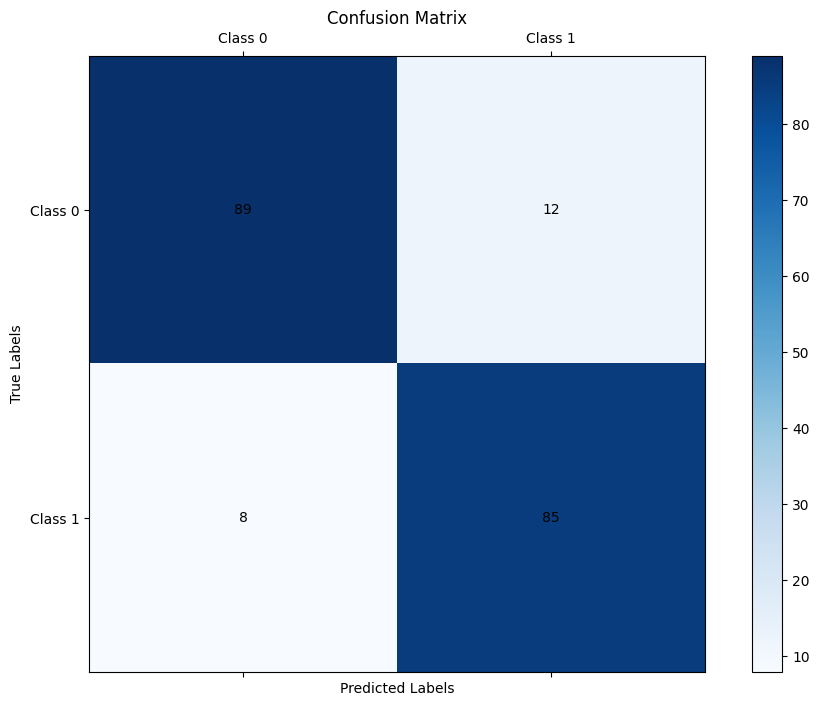

In [44]:
# Loading model for the Stage 1 Classification
stage1_model_path = "/content/drive/MyDrive/Trained_Model/Phase1/bert.pt"
stage1_model_name = "bert-base-uncased"
stage1_model_type = "bert"
stage1_num_labels = 2
trained_model_stage1, trained_tokenizer_stage1 = load_model_and_tokenizer(stage1_model_path, stage1_model_name, stage1_model_type, stage1_num_labels)
trained_model_stage1 = trained_model_stage1.to(device)

cm1 = validate_and_get_confusion_matrix(trained_model_stage1,val_dataloader,device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-23-c3cd29108349>:72: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We rec

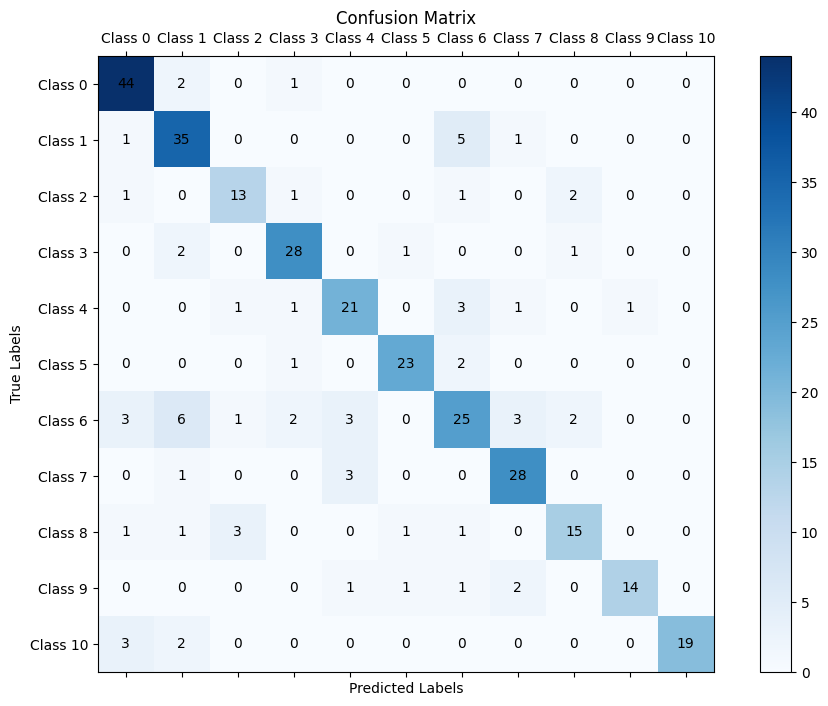

In [47]:
# Loading model for the Stage 2 Classification
stage2_model_path = "/content/drive/MyDrive/Trained_Model/Phase2/bert.pt"
stage2_model_name = "bert-base-uncased"
stage2_model_type = "bert"
stage2_num_labels = 11
trained_model_stage2, trained_tokenizer_stage2 = load_model_and_tokenizer(stage2_model_path, stage2_model_name, stage2_model_type, stage2_num_labels)
trained_model_stage2 = trained_model_stage2.to(device)

cm2 = validate_and_get_confusion_matrix(trained_model_stage2,val_dataloader,device)

# Making Inference 🪄

In [ ]:
!pip install torch numpy pandas spacy scikit-learn transformers contractions sentencepiece llama-parse

import torch
from transformers import BertTokenizer, BertForSequenceClassification, RobertaTokenizer, RobertaForSequenceClassification, XLNetTokenizer, XLNetForSequenceClassification
import re
import pandas as pd
import contractions
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from google.colab import files
from llama_parse import LlamaParse
import os
from google.colab import userdata
import nest_asyncio
nest_asyncio.apply()
from google.colab import drive
drive.mount('/content/drive')

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
os.environ["LLAMA_CLOUD_API_KEY"] = userdata.get('LLAMA_PARSE')
parser = LlamaParse(result_type="markdown", language="en")

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA device for training.")
else:
    device = torch.device("cpu")
    print("Neither MPS nor CUDA device available. Falling back to CPU.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.27.1
    Uninstalling pydantic_core-2.27.1:
      Successfully uninstalled pydantic_core-2.27.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.3
    Uninstalling pydantic-2.10.3:
      Successfully uninstalled pydantic-2.10.3
Mounted at /content/dr

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Using CUDA device for training.


In [49]:
def preprocess_text(text,tokenizer):
    """
    Preprocess the input text by performing:
    - Expansion of contractions
    - Lowercasing
    - Removal of punctuation, special characters, and numbers
    - Stopword removal
    - Lemmatization
    - Bert Tokenizer

    Parameters:
    - text (str): The input text to preprocess
    - nlp: A spaCy NLP pipeline for tokenization, lemmatization, and stopword detection

    Returns:
    - str: Dictionary of input_id,token_type_id and attention_mask
    """
    # Step 1: Expand contractions (e.g., "don't" → "do not")
    text = contractions.fix(text)

    # Step 2: Lowercase the text
    text = text.lower()

    # Step 3: Remove special characters, numbers, and punctuation
    text = re.sub(r"[^a-z\s]", "", text)  # Keep only alphabetic characters and spaces

    # Step 4: Tokenize and process with spaCy
    doc = nlp(text)

    # Step 5: Process tokens - lemmatize, remove stopwords, and filter out empty tokens
    tokens = [
        token.lemma_
        for token in doc
        if not token.is_stop and token.lemma_ not in STOP_WORDS and token.lemma_.strip() != ""
    ]

    # Step 6: Join tokens back into a cleaned text string
    processed_text = " ".join(tokens)

    # Step 7 : Passing the processing text to BERT tokenizer
    return tokenizer(processed_text)



def load_model_and_tokenizer(model_path, model_name, model_type, num_labels):
    """
    Load a saved PyTorch model and tokenizer for inference.

    Parameters:
    - model_path (str): Path to the saved model file (.pt).
    - model_name (str): Name of the pre-trained model (e.g., "bert-base-uncased").
    - model_type (str): Type of model ("bert", "roberta", "xlnet").
    - num_labels (int): Number of labels in the classification task.

    Returns:
    - model: The loaded model.
    - tokenizer: The corresponding tokenizer.
    """
    if model_type == "bert":
        tokenizer = BertTokenizer.from_pretrained(model_name)
        model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    elif model_type == "roberta":
        tokenizer = RobertaTokenizer.from_pretrained(model_name)
        model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    elif model_type == "xlnet":
        tokenizer = XLNetTokenizer.from_pretrained(model_name)
        model = XLNetForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    else:
        raise ValueError("Unsupported model type. Choose 'bert', 'roberta', or 'xlnet'.")

    # Load the saved model weights
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()  # Set to evaluation mode
    return model, tokenizer


def make_inference(model, tokenized_input, device):
    """
    Make predictions on raw text using the trained model.

    Parameters:
    - model: The trained model.
    - tokenized_input (dict): The tokenized input (e.g., output from tokenizer).
    - device (str): "cpu" or "cuda" for inference.

    Returns:
    - prediction: The predicted label for the input text.
    """
    # Convert lists to tensors and move to the same device as the model
    input_ids = torch.tensor(tokenized_input["input_ids"]).unsqueeze(0).to(device)
    attention_mask = torch.tensor(tokenized_input["attention_mask"]).unsqueeze(0).to(device)

    # Forward pass to get logits (predictions)
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Get the predicted class (the index with the maximum logit value)
        prediction = torch.argmax(logits, dim=1).item()

    return prediction


# Loading model for the Stage 1 Classification
stage1_model_path = "/content/drive/MyDrive/Trained_Model/Phase1/bert.pt"
stage1_model_name = "bert-base-uncased"
stage1_model_type = "bert"
stage1_num_labels = 2
trained_model_stage1, trained_tokenizer_stage1 = load_model_and_tokenizer(stage1_model_path, stage1_model_name, stage1_model_type, stage1_num_labels)
trained_model_stage1 = trained_model_stage1.to(device)

# Loading model for the Stage 2 Classification
stage2_model_path = "/content/drive/MyDrive/Trained_Model/Phase2/bert.pt"
stage2_model_name = "bert-base-uncased"
stage2_model_type = "bert"
stage2_num_labels = 11
trained_model_stage2, trained_tokenizer_stage2 = load_model_and_tokenizer(stage2_model_path, stage2_model_name, stage2_model_type, stage2_num_labels)
trained_model_stage2 = trained_model_stage2.to(device)



#================================================== USER INPUT SECTION =================================================================

id2label_stage_1 = {0: 'Non Functional Requirement', 1: 'Functional Requirement'}
id2label_stage_2 = {0: 'Security', 1: 'Usability', 2: 'Availability', 3: 'Performance', 4: 'Maintainability', 5: 'Scalability', 6: 'Operability', 7: 'Look-and-Feel', 8: 'Fault Tolerance', 9: 'Portability', 10: 'Legal'}


# Step 1: Ask user to choose input type
print("Choose input type:")
print("1. Raw Text Input")
print("2. PDF File Upload")

choice = input("Enter 1 or 2: ")

if choice == "1":
    # Step 2: Handle raw text input
    print("\nYou chose Raw Text Input.")
    raw_text = input("Please enter the text:\n")
    print("\nYou provided the following text:")
    print(raw_text)

    # Processing the raw text and calling the infernece function
    tokenized_input_stage1 = preprocess_text(raw_text,trained_tokenizer_stage1)
    predicted_id_stage1 = make_inference(trained_model_stage1,tokenized_input_stage1,device)
    predicted_label_stage1 = id2label_stage_1[predicted_id_stage1]
    if predicted_label_stage1 == 'Functional Requirement':
      print("Functional Requirement")
    else:
      tokenized_input_stage2 = preprocess_text(raw_text,trained_tokenizer_stage2)
      predicted_id_stage2 = make_inference(trained_model_stage2,tokenized_input_stage2,device)
      print(predicted_id_stage2)
      predicted_label_stage2 = id2label_stage_2[predicted_id_stage2]
      print(f"Non functional requirement : {predicted_label_stage2}")

elif choice == "2":
    # Step 2: Handle PDF file upload
    print("\nYou chose PDF File Upload.")
    print("Please upload a PDF file.")
    uploaded = files.upload()

    if uploaded:
        # Assuming `parser` is already initialized (e.g., `parser = LlamaParser()`).
        try:
            docs = parser.load_data(list(uploaded.keys()))  # Pass file names to the parser
            doc_content = ""

            # Concatenate the text from all the documents
            for doc in docs:
                # Processing the raw text and calling the infernece function
                tokenized_input_stage1 = preprocess_text(doc.text,trained_tokenizer_stage1)
                predicted_id_stage1 = make_inference(trained_model_stage1,tokenized_input_stage1,device)
                predicted_label_stage1 = id2label_stage_1[predicted_id_stage1]
                if predicted_label_stage1 == 'Functional Requirement':
                  print("Functional Requirement")
                else:
                  tokenized_input_stage2 = preprocess_text(doc.text,trained_tokenizer_stage2)
                  predicted_id_stage2 = make_inference(trained_model_stage2,tokenized_input_stage2,device)
                  predicted_label_stage2 = id2label_stage_2[predicted_id_stage2]
                  print(f"Non functional requirement : {predicted_label_stage2}")

        except Exception as e:
            print(f"An error occurred while processing the PDF(s): {e}")
    else:
        print("No file uploaded. Please try again.")

else:
    print("Invalid choice. Please restart and enter 1 or 2.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-49-5f29623da474>:72: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We re

Choose input type:
1. Raw Text Input
2. PDF File Upload
Enter 1 or 2: 2

You chose PDF File Upload.
Please upload a PDF file.


Saving Test_Security_merged.pdf to Test_Security_merged.pdf


Parsing files: 100%|██████████| 1/1 [00:07<00:00,  7.28s/it]


Non functional requirement : Security
Non functional requirement : Security
Non functional requirement : Performance
Non functional requirement : Availability


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix


# Validation loop for model evaluation & Confusion Matrix computation
def validate_and_get_confusion_matrix(model, val_loader, device):
    """
    Validate trained model on validation data and return the confusion matrix values.
    Args:
        model: Trained PyTorch model
        val_loader: DataLoader for validation data
        device: Device to use for computation
    Returns:
        confusion_matrix_values: A NumPy array containing the confusion matrix values
    """
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch_data in val_loader:
            input_ids = batch_data["input_ids"].to(device)
            attention_mask = batch_data["attention_mask"].to(device)
            labels = batch_data["labels"].to(device)

            # Perform inference
            logits = model(input_ids, attention_mask=attention_mask).logits
            preds = logits.argmax(dim=-1).cpu().numpy()
            labels = labels.cpu().numpy()

            # Collect predictions and true labels
            all_preds.extend(preds)
            all_labels.extend(labels)

    # Compute confusion matrix
    confusion_matrix_values = confusion_matrix(all_labels, all_preds)

    # Log computed confusion matrix values
    print("Confusion Matrix Values:")
    print(confusion_matrix_values)

    # Log accuracy
    accuracy = (np.array(all_preds) == np.array(all_labels)).mean()
    print(f"Validation Accuracy: {accuracy:.2%}")
    wandb.log({
        "validation_accuracy": accuracy,
    })

    return confusion_matrix_values